In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
plt.style.use(['notebook','grid'])

In [8]:
df = pd.read_csv('Pi100.txt',sep = '\s+',names =['T','M_x','M_y','M_z','E_total','E_demag','E_exch','B_extx','B_exty','B_extz'])
df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_121330/3283347718.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Pi100.txt',sep = '\s+',names =['T','M_x','M_y','M_z','E_total','E_demag','E_exch','B_extx','B_exty','B_extz'])


,T,M_x,M_y,M_z,E_total,E_demag,E_exch,B_extx,B_exty,B_extz
0,0.000000e+00,-0.028700,-0.008049,-0.000230,2.060269e-17,1.690690e-17,3.768088e-18,-0.000385,9.121492e-16,0
1,2.000478e-10,-0.052422,-0.007325,-0.000344,2.052182e-17,1.553655e-17,5.117340e-18,-0.000385,9.121492e-16,0
2,4.000528e-10,-0.101618,-0.007115,-0.000452,2.009815e-17,1.479425e-17,5.559887e-18,-0.000385,9.121492e-16,0
3,6.000682e-10,-0.173322,-0.006985,-0.000337,1.975786e-17,1.441562e-17,5.778861e-18,-0.000385,9.121492e-16,0
4,8.000420e-10,-0.272219,-0.006485,-0.000155,1.936030e-17,1.444025e-17,5.605805e-18,-0.000385,9.121492e-16,0
5,1.000086e-09,-0.375321,-0.006247,-0.000108,1.897820e-17,1.454265e-17,5.381029e-18,-0.000385,9.121492e-16,0
6,1.200097e-09,-0.471946,-0.005486,0.000174,1.866038e-17,1.451270e-17,5.336577e-18,-0.000385,9.121492e-16,0
7,1.400076e-09,-0.574495,-0.004479,-0.000003,1.831889e-17,1.451916e-17,5.246975e-18,-0.000385,9.121492e-16,0
8,1.600054e-09,-0.697731,-0.003728,0.000144,1.782881e-17,1.421722e-17,5.369297e-18,-0.000385,9.121492e-16,0
9,1.800111e-09,-0.898426,-0.001048,-0.000198,1.658777e-17,1.297386e-17,5.877232e-18,-0.000385,9.121492e-16,0


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_121330/1227318413.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Pi100.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])


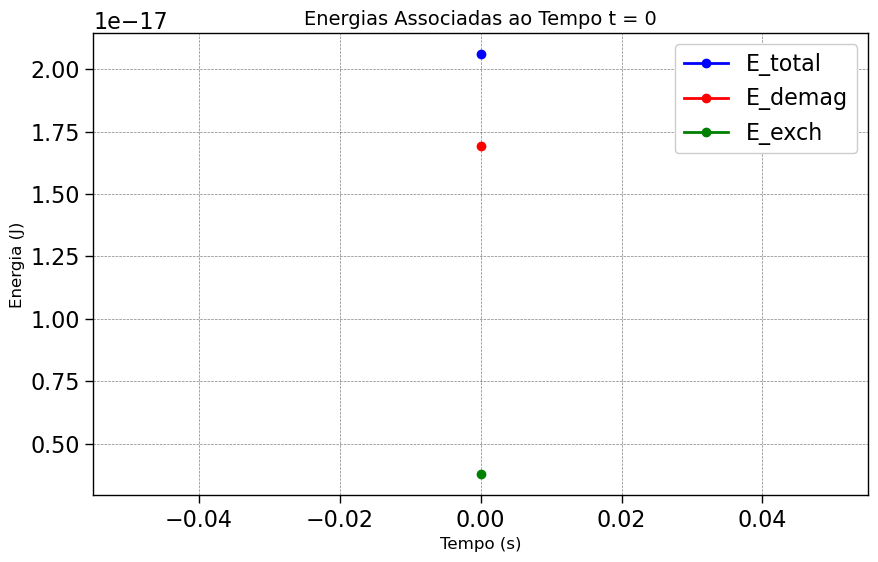

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('Pi100.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])

# Filtrando os dados para o tempo t = 0
df_t0 = df[df['T'] == 0]

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotando as energias associadas
plt.plot(df_t0['T'], df_t0['E_total'], label='E_total', marker='o', color='blue')
plt.plot(df_t0['T'], df_t0['E_demag'], label='E_demag', marker='o', color='red')
plt.plot(df_t0['T'], df_t0['E_exch'], label='E_exch', marker='o', color='green')

# Adicionando título e rótulos
plt.title('Energias Associadas ao Tempo t = 0', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Energia (J)', fontsize=12)

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


In [13]:
df2 = pd.read_csv('Pi4.txt',sep = '\s+',names =['T','M_x','M_y','M_z','E_total','E_demag','E_exch','B_extx','B_exty','B_extz'])
df2

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_121330/1760118821.py:1: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv('Pi4.txt',sep = '\s+',names =['T','M_x','M_y','M_z','E_total','E_demag','E_exch','B_extx','B_exty','B_extz'])


,T,M_x,M_y,M_z,E_total,E_demag,E_exch,B_extx,B_exty,B_extz
0,0.000000e+00,-0.035074,-0.182620,-0.000007,3.070670e-17,2.680754e-17,3.810996e-18,0.000104,2.248919e-15,0
1,2.000080e-10,-0.022555,-0.178546,0.000165,3.057410e-17,2.481085e-17,5.707071e-18,0.000104,2.248919e-15,0
2,4.000521e-10,0.003917,-0.178771,-0.000644,3.003785e-17,2.431153e-17,5.736133e-18,0.000104,2.248919e-15,0
3,6.000150e-10,0.054209,-0.178252,-0.000077,2.970427e-17,2.432626e-17,5.514381e-18,0.000104,2.248919e-15,0
4,8.001248e-10,0.131903,-0.175491,0.000068,2.937019e-17,2.422206e-17,5.480274e-18,0.000104,2.248919e-15,0
5,1.000090e-09,0.227171,-0.169469,-0.000124,2.898495e-17,2.404989e-17,5.506942e-18,0.000104,1.999040e-15,0
6,1.200090e-09,0.332950,-0.158472,0.000159,2.854662e-17,2.385270e-17,5.532872e-18,0.000104,1.999040e-15,0
7,1.400036e-09,0.447415,-0.141794,0.000079,2.804870e-17,2.362606e-17,5.552442e-18,0.000104,1.999040e-15,0
8,1.600106e-09,0.569493,-0.118483,-0.000082,2.748149e-17,2.329670e-17,5.626963e-18,0.000104,1.999040e-15,0
9,1.800075e-09,0.701863,-0.086070,0.000026,2.679814e-17,2.286503e-17,5.717764e-18,0.000104,2.248919e-15,0


In [23]:
df3 = pd.read_csv('Pi2.txt',sep = '\s+',names =['T','M_x','M_y','M_z','E_total','E_demag','E_exch','B_extx','B_exty','B_extz'])
df3

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_121330/794770610.py:1: SyntaxWarning: invalid escape sequence '\s'
  df3 = pd.read_csv('Pi2.txt',sep = '\s+',names =['T','M_x','M_y','M_z','E_total','E_demag','E_exch','B_extx','B_exty','B_extz'])


,T,M_x,M_y,M_z,E_total,E_demag,E_exch,B_extx,B_exty,B_extz
0,0.000000e+00,-0.024326,-0.381494,0.000177,3.649449e-17,3.267529e-17,3.830121e-18,-0.000056,-8.009310e-15,0
1,2.000430e-10,-0.046074,-0.363584,-0.000244,3.624749e-17,2.940003e-17,6.868696e-18,-0.000056,-8.009310e-15,0
2,4.000607e-10,-0.106589,-0.364962,-0.000188,3.563579e-17,2.940578e-17,6.278707e-18,-0.000056,-9.241511e-15,0
3,6.000954e-10,-0.197653,-0.355548,-0.000177,3.514592e-17,2.911928e-17,6.117545e-18,-0.000056,-6.777108e-15,0
4,8.000370e-10,-0.308453,-0.333557,0.000023,3.466821e-17,2.861088e-17,6.200940e-18,-0.000056,-9.241511e-15,0
5,1.000104e-09,-0.426732,-0.297474,0.000008,3.419451e-17,2.801866e-17,6.377976e-18,-0.000056,-8.009310e-15,0


In [31]:
df4 = pd.read_csv('3pi2.txt',sep = '\s+',names =['T','M_x','M_y','M_z','E_total','E_demag','E_exch','B_extx','B_exty','B_extz'])
df4

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_121330/1695705561.py:1: SyntaxWarning: invalid escape sequence '\s'
  df4 = pd.read_csv('3pi2.txt',sep = '\s+',names =['T','M_x','M_y','M_z','E_total','E_demag','E_exch','B_extx','B_exty','B_extz'])


,T,M_x,M_y,M_z,E_total,E_demag,E_exch,B_extx,B_exty,B_extz
0,0.000000e+00,-0.000843,-0.710407,-0.001094,3.508253e-17,2.878078e-17,6.299640e-18,0.000021,-3.657624e-14,0
1,2.000288e-10,0.028177,-0.709060,-0.001181,3.504613e-17,2.872809e-17,6.390297e-18,0.000021,-2.532201e-14,0
2,4.000188e-10,0.164163,-0.676963,-0.000730,3.442463e-17,2.812983e-17,6.720526e-18,0.000021,-2.532201e-14,0
3,6.001108e-10,0.298008,-0.588339,-0.000453,3.349372e-17,2.702614e-17,7.301418e-18,0.000021,-3.657624e-14,0
4,8.000720e-10,0.374777,-0.486575,-0.000505,3.287478e-17,2.713512e-17,6.896706e-18,0.000021,-2.532201e-14,0
5,1.000056e-09,0.399801,-0.421113,-0.001724,3.264180e-17,2.736817e-17,6.606954e-18,0.000021,-2.532201e-14,0
6,1.200067e-09,0.400330,-0.422251,-0.002151,3.259150e-17,2.738656e-17,6.536322e-18,0.000021,-2.532201e-14,0
7,1.400099e-09,0.386312,-0.458633,-0.002181,3.252349e-17,2.717278e-17,6.583713e-18,0.000021,-2.532201e-14,0
8,1.600084e-09,0.367275,-0.498237,-0.001895,3.245674e-17,2.690674e-17,6.672191e-18,0.000021,-3.657624e-14,0
9,1.800011e-09,0.357396,-0.514506,-0.001332,3.243723e-17,2.676074e-17,6.750505e-18,0.000021,-2.532201e-14,0


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_121330/4207963874.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Pi100.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
/tmp/ipykernel_121330/4207963874.py:6: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv('Pi4.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])


<Figure size 1200x800 with 0 Axes>

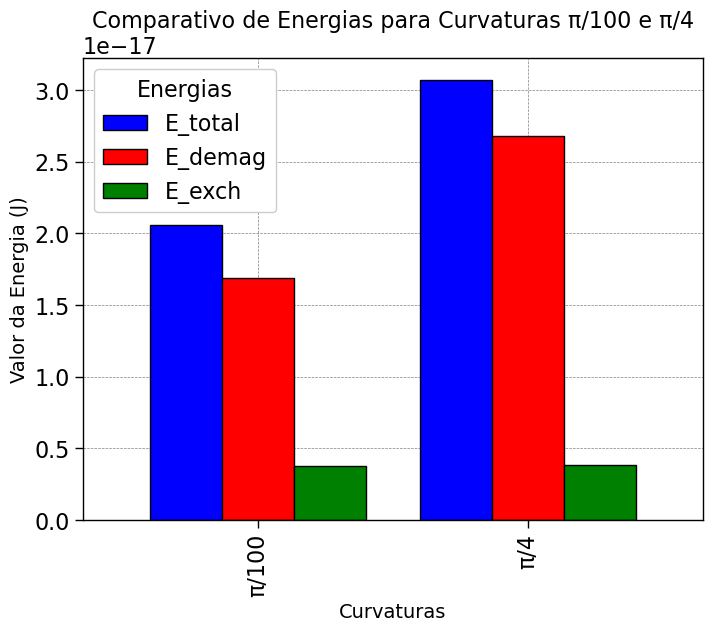

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('Pi100.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
df2 = pd.read_csv('Pi4.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])

# Filtrando os dados para o tempo t = 0
df_t0 = df[df['T'] == 0]
df2_t0 = df2[df2['T'] == 0]

# Pegando as energias para t = 0 para ambas as curvaturas
energies_df = {
    'E_total': df_t0['E_total'].values[0],
    'E_demag': df_t0['E_demag'].values[0],
    'E_exch': df_t0['E_exch'].values[0]
}

energies_df2 = {
    'E_total': df2_t0['E_total'].values[0],
    'E_demag': df2_t0['E_demag'].values[0],
    'E_exch': df2_t0['E_exch'].values[0]
}

# Criando um DataFrame para plotar as energias
df_energies = pd.DataFrame([energies_df, energies_df2], index=['π/100', 'π/4'])

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))

# Plotando as barras para comparar as energias
df_energies.plot(kind='bar', width=0.8, color=['blue', 'red', 'green'], edgecolor='black')

# Adicionando título e rótulos
plt.title('Comparativo de Energias para Curvaturas π/100 e π/4', fontsize=16)
plt.xlabel('Curvaturas', fontsize=14)
plt.ylabel('Valor da Energia (J)', fontsize=14)

# Adicionando a legenda
plt.legend(title="Energias", loc='upper left')

# Exibindo o gráfico
plt.grid(True)
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_121330/821500072.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Pi100.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
/tmp/ipykernel_121330/821500072.py:6: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv('Pi4.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
/tmp/ipykernel_121330/821500072.py:7: SyntaxWarning: invalid escape sequence '\s'
  df3 = pd.read_csv('Pi2.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])


<Figure size 1200x800 with 0 Axes>

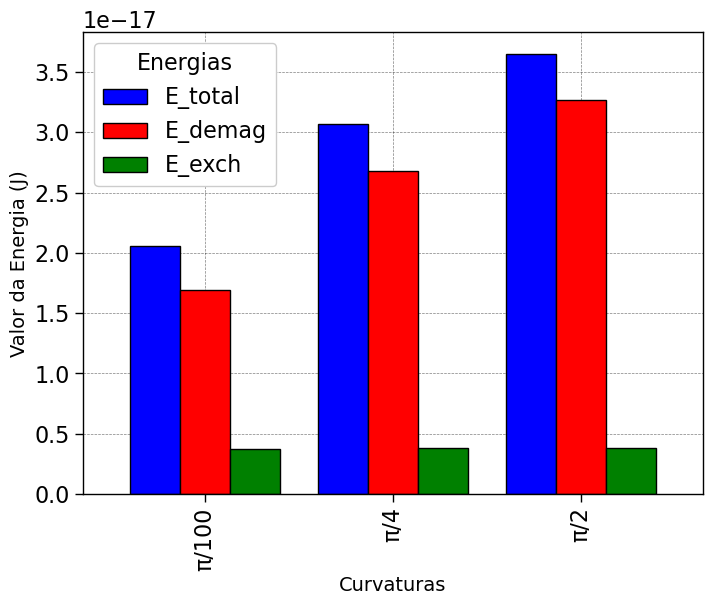

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('Pi100.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
df2 = pd.read_csv('Pi4.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
df3 = pd.read_csv('Pi2.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])

# Filtrando os dados para o tempo t = 0
df_t0 = df[df['T'] == 0]
df2_t0 = df2[df2['T'] == 0]
df3_t0 = df3[df3['T'] == 0]

# Pegando as energias para t = 0 para todas as curvaturas
energies_df = {
    'E_total': df_t0['E_total'].values[0],
    'E_demag': df_t0['E_demag'].values[0],
    'E_exch': df_t0['E_exch'].values[0]
}

energies_df2 = {
    'E_total': df2_t0['E_total'].values[0],
    'E_demag': df2_t0['E_demag'].values[0],
    'E_exch': df2_t0['E_exch'].values[0]
}

energies_df3 = {
    'E_total': df3_t0['E_total'].values[0],
    'E_demag': df3_t0['E_demag'].values[0],
    'E_exch': df3_t0['E_exch'].values[0]
}

# Criando um DataFrame para plotar as energias
df_energies = pd.DataFrame([energies_df, energies_df2, energies_df3], index=['π/100', 'π/4', 'π/2'])

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))

# Plotando as barras para comparar as energias
df_energies.plot(kind='bar', width=0.8, color=['blue', 'red', 'green'], edgecolor='black')

# Adicionando título e rótulos
plt.xlabel('Curvaturas', fontsize=14)
plt.ylabel('Valor da Energia (J)', fontsize=14)

# Adicionando a legenda
plt.legend(title="Energias", loc='upper left')

# Exibindo o gráfico
plt.grid(True)
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_121330/3043823740.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Pi100.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
/tmp/ipykernel_121330/3043823740.py:6: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv('Pi4.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
/tmp/ipykernel_121330/3043823740.py:7: SyntaxWarning: invalid escape sequence '\s'
  df3 = pd.read_csv('Pi2.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z',

<Figure size 1200x800 with 0 Axes>

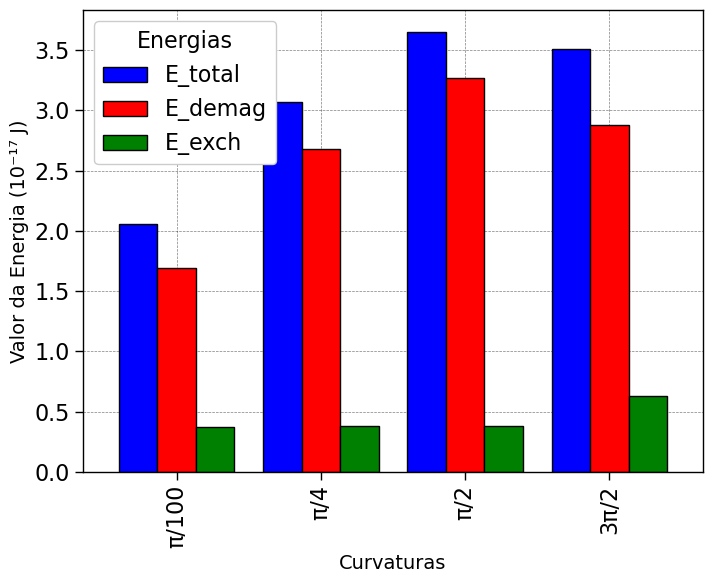

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('Pi100.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
df2 = pd.read_csv('Pi4.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
df3 = pd.read_csv('Pi2.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
df4 = pd.read_csv('3pi2.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])

# Filtrando os dados para o tempo t = 0
df_t0 = df[df['T'] == 0]
df2_t0 = df2[df2['T'] == 0]
df3_t0 = df3[df3['T'] == 0]
df4_t0 = df4[df4['T'] == 0]

# Pegando as energias para t = 0 para todas as curvaturas
energies_df = {
    'E_total': df_t0['E_total'].values[0] * 1e17,  # Multiplicando por 10^17
    'E_demag': df_t0['E_demag'].values[0] * 1e17,
    'E_exch': df_t0['E_exch'].values[0] * 1e17
}

energies_df2 = {
    'E_total': df2_t0['E_total'].values[0] * 1e17,
    'E_demag': df2_t0['E_demag'].values[0] * 1e17,
    'E_exch': df2_t0['E_exch'].values[0] * 1e17
}

energies_df3 = {
    'E_total': df3_t0['E_total'].values[0] * 1e17,
    'E_demag': df3_t0['E_demag'].values[0] * 1e17,
    'E_exch': df3_t0['E_exch'].values[0] * 1e17
}

energies_df4 = {
    'E_total': df4_t0['E_total'].values[0] * 1e17,
    'E_demag': df4_t0['E_demag'].values[0] * 1e17,
    'E_exch': df4_t0['E_exch'].values[0] * 1e17
}
# Criando um DataFrame para plotar as energias
df_energies = pd.DataFrame([energies_df, energies_df2, energies_df3, energies_df4], index=['π/100', 'π/4', 'π/2', '3π/2' ])

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))

# Plotando as barras para comparar as energias
df_energies.plot(kind='bar', width=0.8, color=['blue', 'red', 'green'], edgecolor='black')

# Adicionando título e rótulos
plt.xlabel('Curvaturas', fontsize=14)
plt.ylabel('Valor da Energia (10⁻¹⁷ J)', fontsize=14)  # Atualizando o rótulo do eixo Y

# Adicionando a legenda
plt.legend(title="Energias", loc='upper left')

# Ajustando os valores do eixo Y para refletir a escala multiplicada
plt.yscale('linear')
plt.savefig('EnergiasxCurvaturas.pdf')

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_121330/158450795.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Pi100.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
/tmp/ipykernel_121330/158450795.py:6: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv('Pi4.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
/tmp/ipykernel_121330/158450795.py:7: SyntaxWarning: invalid escape sequence '\s'
  df3 = pd.read_csv('Pi2.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E

<Figure size 1200x800 with 0 Axes>

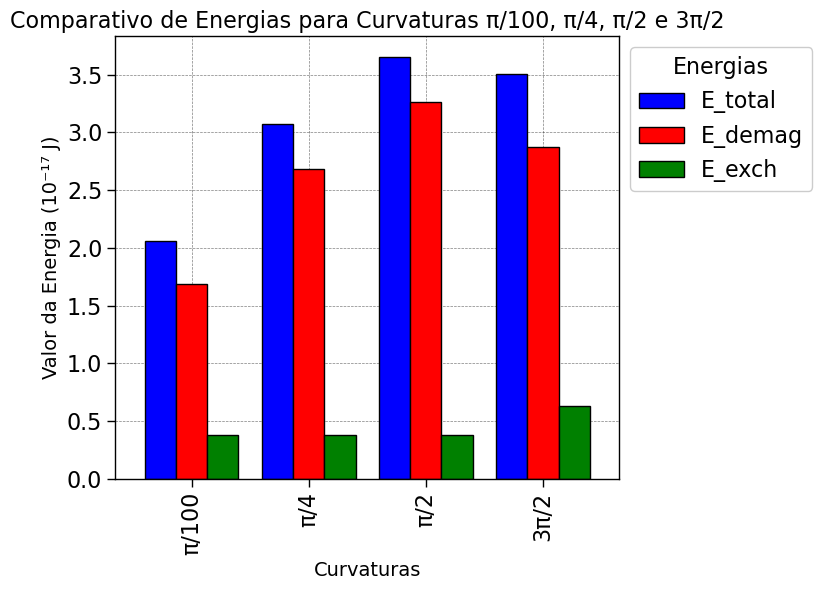

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('Pi100.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
df2 = pd.read_csv('Pi4.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
df3 = pd.read_csv('Pi2.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])
df4 = pd.read_csv('3pi2.txt', sep='\s+', names=['T', 'M_x', 'M_y', 'M_z', 'E_total', 'E_demag', 'E_exch', 'B_extx', 'B_exty', 'B_extz'])

# Filtrando os dados para o tempo t = 0
df_t0 = df[df['T'] == 0]
df2_t0 = df2[df2['T'] == 0]
df3_t0 = df3[df3['T'] == 0]
df4_t0 = df4[df4['T'] == 0]

# Pegando as energias para t = 0 para todas as curvaturas
energies_df = {
    'E_total': df_t0['E_total'].values[0] * 1e17,  # Multiplicando por 10^17
    'E_demag': df_t0['E_demag'].values[0] * 1e17,
    'E_exch': df_t0['E_exch'].values[0] * 1e17
}

energies_df2 = {
    'E_total': df2_t0['E_total'].values[0] * 1e17,
    'E_demag': df2_t0['E_demag'].values[0] * 1e17,
    'E_exch': df2_t0['E_exch'].values[0] * 1e17
}

energies_df3 = {
    'E_total': df3_t0['E_total'].values[0] * 1e17,
    'E_demag': df3_t0['E_demag'].values[0] * 1e17,
    'E_exch': df3_t0['E_exch'].values[0] * 1e17
}

energies_df4 = {
    'E_total': df4_t0['E_total'].values[0] * 1e17,
    'E_demag': df4_t0['E_demag'].values[0] * 1e17,
    'E_exch': df4_t0['E_exch'].values[0] * 1e17
}

# Criando um DataFrame para plotar as energias
df_energies = pd.DataFrame([energies_df, energies_df2, energies_df3, energies_df4], index=['π/100', 'π/4', 'π/2', '3π/2' ])

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))

# Plotando as barras para comparar as energias
df_energies.plot(kind='bar', width=0.8, color=['blue', 'red', 'green'], edgecolor='black')

# Adicionando título e rótulos
plt.title('Comparativo de Energias para Curvaturas π/100, π/4, π/2 e 3π/2', fontsize=16)
plt.xlabel('Curvaturas', fontsize=14)
plt.ylabel('Valor da Energia (10⁻¹⁷ J)', fontsize=14)  # Atualizando o rótulo do eixo Y

# Ajuste da posição da legenda
plt.legend(title="Energias", loc='upper left', bbox_to_anchor=(1, 1))

# Melhorar o layout do gráfico para evitar sobreposição
plt.tight_layout()
plt.savefig('EnergiasxCurvaturas.pdf')


Parâmetros ajustados: [-2.34436437e-18  1.41531355e-17  2.04231161e-17]


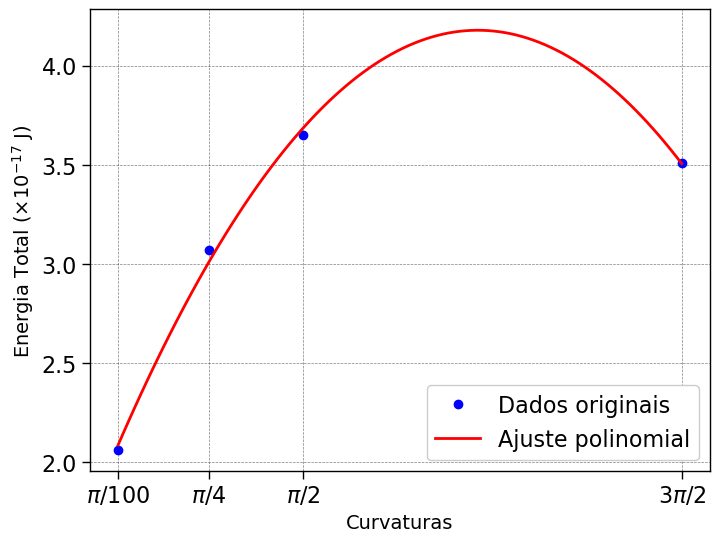

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados de curvaturas e energia total fornecidos
curvaturas_corrigidas = np.array([np.pi/100, np.pi/4, np.pi/2, 3*np.pi/2])  # Curvaturas em radianos
energia_total_corrigida = np.array([2.060269e-17, 3.070670e-17, 3.649449e-17, 3.508253e-17])  # Energia total

# Modelo polinomial de grau 2
def modelo(x, a, b, c):
    return a * x**2 + b * x + c

# Ajuste polinomial de grau 2
parametros_corrigidos, covariancia_corrigida = curve_fit(modelo, curvaturas_corrigidas, energia_total_corrigida)

# Multiplicando os valores do eixo Y por 1e17 para ajustar as escalas
energia_total_corrigida_multiplicada = energia_total_corrigida * 1e17

# Plotando os dados e o ajuste com as curvaturas no eixo X
plt.plot(curvaturas_corrigidas, energia_total_corrigida_multiplicada, 'bo', label='Dados originais')
plt.xticks(curvaturas_corrigidas, [r'$\pi/100$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/2$'])  # Curvaturas no eixo X
x_fine_corrigido = np.linspace(min(curvaturas_corrigidas), max(curvaturas_corrigidas), 100)
plt.plot(x_fine_corrigido, modelo(x_fine_corrigido, *parametros_corrigidos) * 1e17, 'r-', label='Ajuste polinomial')

# Ajustando a legenda do eixo Y para incluir 10^-17 J
plt.xlabel('Curvaturas',fontsize = 14)
plt.ylabel(r'Energia Total ($\times 10^{-17}$ J)', fontsize = 14)
plt.legend()


# Parâmetros ajustados para os dados corrigidos
print('Parâmetros ajustados:', parametros_corrigidos)
plt.savefig('FitEtotal.pdf')

# Gráfico dos Comprimentos In e Out

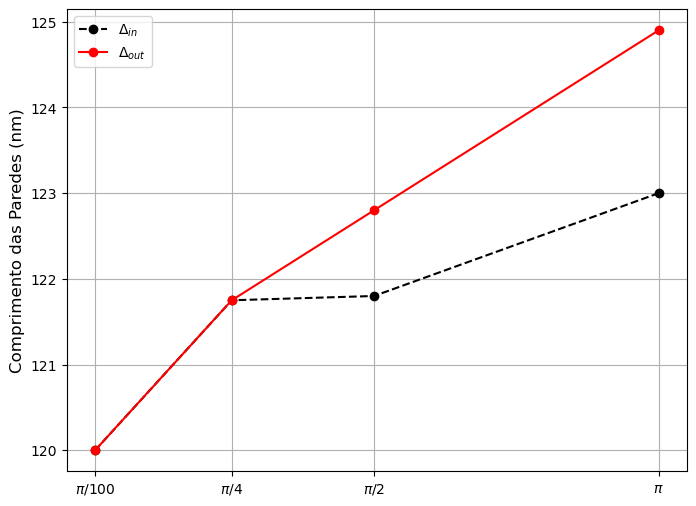

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os comprimentos das paredes para as curvas \Delta in e \Delta out (em nm)
comprimentos_in = [120, 121.75, 121.80, 123.0]  # Exemplos para \Delta in
comprimentos_out = [120, 121.75, 122.80, 124.90]  # Exemplos para \Delta out

# Definindo os valores das curvaturas no eixo X
curvaturas = [np.pi/100, np.pi/4, np.pi/2, np.pi]

# Criando o gráfico
plt.figure(figsize=(8, 6))

# Plotando \Delta in (curva preta)
plt.plot(curvaturas, comprimentos_in, marker='o', linestyle='--', color='black', label=r"$\Delta_{in}$")

# Plotando \Delta out (curva vermelha)
plt.plot(curvaturas, comprimentos_out, marker='o', linestyle='-', color='red', label=r"$\Delta_{out}$")

# Adicionando rótulos e título
plt.xticks(curvaturas, [r'$\pi/100$', r'$\pi/4$', r'$\pi/2$', r'$\pi$'])  # Curvaturas no eixo X
plt.ylabel('Comprimento das Paredes (nm)', fontsize=12)

# Exibindo o gráfico
plt.legend()
plt.grid(True)
plt.show()


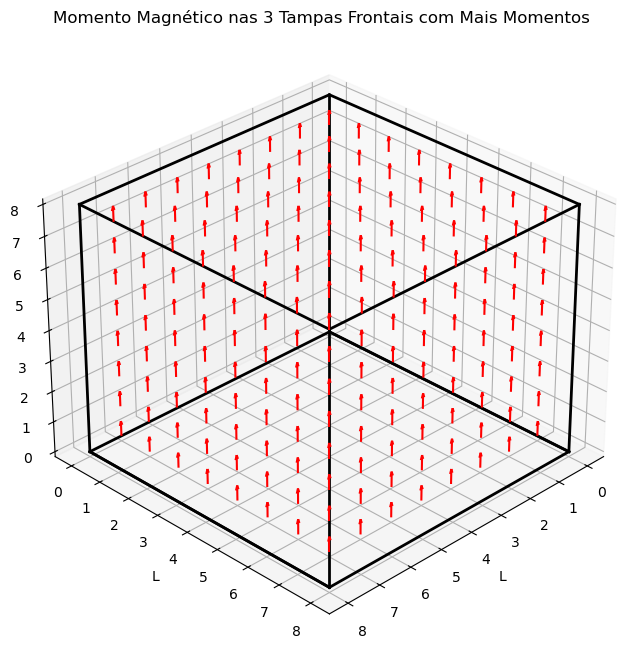

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Função para gerar momentos magnéticos nas 3 tampas frontais, com mais momentos magnéticos
def gerar_momentos_mag_com_mais_momentos(L, passo=1):
    # Gera vetores nas 3 tampas frontais, com mais momentos magnéticos
    momentos = np.zeros((L, L, L, 3))  # Vetores nulos
    # Adiciona vetores nas 3 tampas frontais (última camada para X, Y e Z)
    momentos[::passo, ::passo, L-1, 2] = 1  # Frente no plano XY
    momentos[::passo, L-1, ::passo, 2] = 1  # Frente no plano XZ
    momentos[L-1, ::passo, ::passo, 2] = 1  # Frente no plano YZ
    return momentos

# Tamanho do cubo menor
L_menor = 8  # Tamanho do cubo

# Gerar pontos no cubo
x_menor, y_menor, z_menor = np.meshgrid(np.arange(0, L_menor, 1), np.arange(0, L_menor, 1), np.arange(0, L_menor, 1))

# Aumentando o número de momentos magnéticos, por exemplo, com passo de 1
passo = 1  # Define a densidade dos vetores
momentos_cima_mais_momentos = gerar_momentos_mag_com_mais_momentos(L_menor, passo)

# Visualiza os momentos magnéticos com mais vetores nas 3 tampas frontais e contorno total do cubo
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plota os vetores (momentos magnéticos) todos para cima nas 3 tampas frontais do cubo
ax.quiver(x_menor, y_menor, z_menor, momentos_cima_mais_momentos[:, :, :, 0], momentos_cima_mais_momentos[:, :, :, 1], momentos_cima_mais_momentos[:, :, :, 2], length=0.5, normalize=True, color='r')

# Contorno do cubo - desenha as arestas do cubo com linhas pretas (fechando completamente o cubo)
# Linhas nas 3 tampas frontais
ax.plot([0, L_menor], [0, 0], [L_menor, L_menor], color='black', linewidth=2)  # Linha inferior na tampa XY
ax.plot([0, L_menor], [L_menor, L_menor], [L_menor, L_menor], color='black', linewidth=2)  # Linha superior na tampa XY

# Contorno nas 3 bordas verticais
ax.plot([0, 0], [0, L_menor], [L_menor, L_menor], color='black', linewidth=2)  # Linha frontal esquerda na tampa XZ
ax.plot([L_menor, L_menor], [0, L_menor], [L_menor, L_menor], color='black', linewidth=2)  # Linha frontal direita na tampa XZ
ax.plot([0, 0], [0, L_menor], [0, 0], color='black', linewidth=2)  # Linha frontal esquerda na tampa YZ
ax.plot([L_menor, L_menor], [0, L_menor], [0, 0], color='black', linewidth=2)  # Linha frontal direita na tampa YZ

# Fechando as bordas do cubo
ax.plot([0, 0], [0, 0], [0, L_menor], color='black', linewidth=2)  # Linha vertical esquerda no plano YZ
ax.plot([L_menor, L_menor], [0, 0], [0, L_menor], color='black', linewidth=2)  # Linha vertical direita no plano YZ
ax.plot([0, 0], [L_menor, L_menor], [0, L_menor], color='black', linewidth=2)  # Linha vertical esquerda no plano XZ
ax.plot([L_menor, L_menor], [L_menor, L_menor], [0, L_menor], color='black', linewidth=2)  # Linha vertical direita no plano XZ

# Fechar o lado de trás do cubo
ax.plot([0, 0], [0, L_menor], [0, 0], color='black', linewidth=2)  # Linha traseira esquerda
ax.plot([L_menor, L_menor], [0, L_menor], [0, 0], color='black', linewidth=2)  # Linha traseira direita
ax.plot([0, L_menor], [0, 0], [0, 0], color='black', linewidth=2)  # Linha inferior traseira
ax.plot([0, L_menor], [L_menor, L_menor], [0, 0], color='black', linewidth=2)  # Linha superior traseira

# Definindo o título e rótulos
ax.set_title("Momento Magnético nas 3 Tampas Frontais com Mais Momentos")
ax.set_xlabel("L")
ax.set_ylabel("L")
ax.set_zlabel("L")

# Ajuste para melhorar a visualização
ax.view_init(elev=30, azim=45)  # Ajusta o ângulo de visualização
